# Table of Contents

## Import Libraries and Data
## Wrangle and Format Data
## Wrangle World Happiness Report 2019
## Merge Data Sets
## Correlation Matrix
## Visualizations

# Import Libraries and Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# create path
path = r'C:\Users\18602\Documents\Data Analytics\Data Immersion\Month 6\A6 Project'

In [6]:
# import happiness 2019 data
happy = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'happy_2019.csv'),index_col = False)

In [7]:
# check output
happy.head()

,Unnamed: 0,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Government Trust,Year
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [75]:
# import alternate data
newsuicide = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','suicide2.csv'))

In [76]:
# check output
newsuicide.head()

,Country,All,Male,Female
0,Afghanistan,6.0,6.2,5.7
1,Albania,3.7,5.3,2.2
2,Algeria,2.6,3.3,1.9
3,Angola,12.6,21.7,4.7
4,Antigua and Barbuda,0.3,0.0,0.6


# Wrange and Format Data

In [77]:
# columns
newsuicide.columns

Index(['Country', 'All', 'Male', 'Female'], dtype='object')

In [78]:
# shape
newsuicide.shape

(189, 4)

In [79]:
# describe
newsuicide.describe()

,All,Male,Female
count,189.000000,189.000000,189.000000
mean,10.101058,16.114815,4.579894
std,8.548429,14.710612,3.545602
min,0.300000,0.000000,0.200000
25%,5.300000,7.900000,2.300000
50%,8.300000,13.300000,3.900000
75%,12.300000,19.600000,6.100000
max,87.500000,146.900000,34.600000


In [80]:
# remove unnecessary columns
newsuicide = newsuicide[['Country','All']]

In [81]:
# check for nulls
newsuicide.isnull().sum()

Country    0
All        0
dtype: int64

In [82]:
# format column titles
newsuicide.rename(columns = {'All' : 'Suicides / 100,000'}, inplace = True)

In [83]:
newsuicide.columns

Index(['Country', 'Suicides / 100,000'], dtype='object')

In [84]:
# check dtypes
newsuicide.dtypes

Country                object
Suicides / 100,000    float64
dtype: object

In [85]:
# duplicates
df_dups = newsuicide[newsuicide.duplicated()]

In [86]:
df_dups.head()

,Country,"Suicides / 100,000"


In [ ]:
# check output
newsuicide.head(20)

# Wrangle World Happiness Report 2019

In [88]:
# check output
happy.head()

,Unnamed: 0,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Government Trust,Year
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [89]:
# create subset
happy2 = happy[['Rank','Country','Score']]

In [90]:
# check subset
happy2.head(20)

,Rank,Country,Score
0,1,Finland,7.769
1,2,Denmark,7.600
2,3,Norway,7.554
3,4,Iceland,7.494
4,5,Netherlands,7.488
5,6,Switzerland,7.480
6,7,Sweden,7.343
7,8,New Zealand,7.307
8,9,Canada,7.278
9,10,Austria,7.246


# Merge Data Sets

In [91]:
# merge data
df = happy2.merge(newsuicide, on =  'Country', how = 'left')

In [92]:
# check merge
df.head(20)

,Rank,Country,Score,"Suicides / 100,000"
0,1,Finland,7.769,13.4
1,2,Denmark,7.600,7.6
2,3,Norway,7.554,11.8
3,4,Iceland,7.494,11.2
4,5,Netherlands,7.488,9.3
5,6,Switzerland,7.480,9.8
6,7,Sweden,7.343,12.4
7,8,New Zealand,7.307,10.3
8,9,Canada,7.278,10.3
9,10,Austria,7.246,10.4


In [93]:
# check for nulls
df.isnull().sum()

Rank                  0
Country               0
Score                 0
Suicides / 100,000    9
dtype: int64

In [96]:
# check dtypes for matrix
df.dtypes

Rank                    int64
Country                object
Score                 float64
Suicides / 100,000    float64
dtype: object

# Correlation Matrix

In [101]:
# fill in nulls
df.fillna(0, inplace = True)

In [102]:
# create subplot
df2 = df[['Rank','Score','Suicides / 100,000']]

In [103]:
# correlation one
df2.corr()

,Rank,Score,"Suicides / 100,000"
Rank,1.000000,-0.989096,0.145331
Score,-0.989096,1.000000,-0.140314
"Suicides / 100,000",0.145331,-0.140314,1.000000


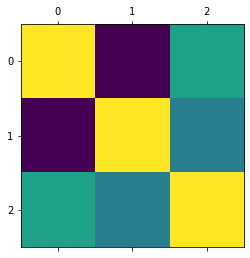

In [105]:
# correlation 2
plt.matshow(df2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

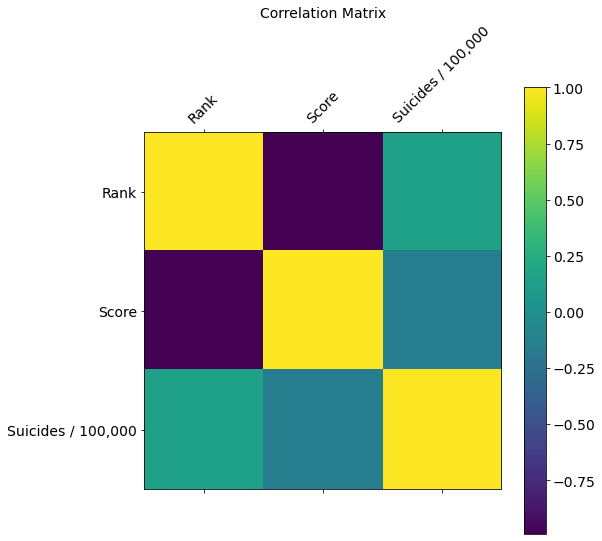

In [107]:
# correlation 3
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

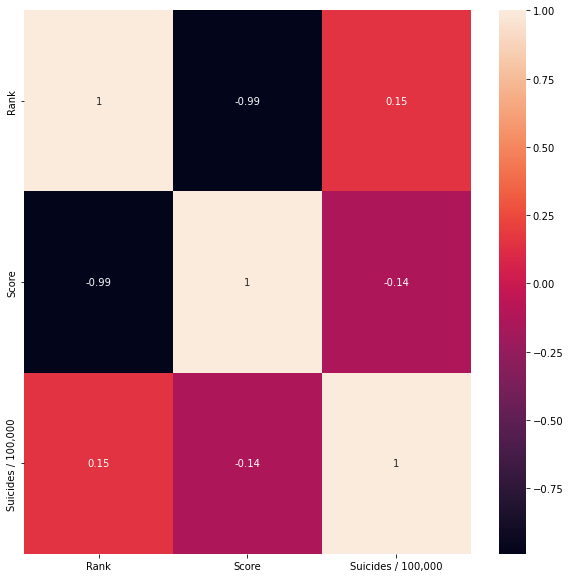

In [108]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

# Visualizations

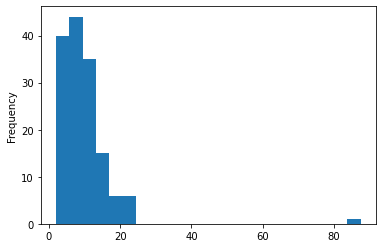

In [98]:
# histogram
hist = df['Suicides / 100,000'].plot.hist(bins = 23)

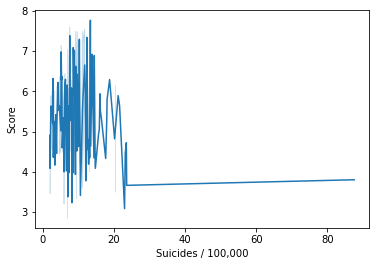

In [99]:
# line plot
line = sns.lineplot(data = df, x = 'Suicides / 100,000',y = 'Score')

In [97]:
# export data
df.to_csv(os.path.join(path, '02 Data','Prepared Data','suicidewhr.csv'))